In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

In [3]:
train = pd.read_csv("/content/drive/MyDrive/case_study_1/train.csv")
Y     = train['TARGET'].tolist()
train.drop(['ID','TARGET'],axis=1,inplace=True)

In [4]:
#Checking if there are any null values in the entire train dataset
train.isnull().sum().any()

False

In [5]:
train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

In [6]:
# Removing repeated columns in a DataFrame
# https://sparkbyexamples.com/pandas/pandas-remove-duplicate-columns-from-dataframe/#:~:text=To%20drop%20duplicate%20columns%20from%20pandas%20DataFrame%20use%20df.,data%20regardless%20of%20column%20names.
def duplicate_removal(df):
    print("Number of Columns before removing the duplicate features",df.shape[1])
    df = df.T.drop_duplicates().T
    print("Number of Columns after removing the duplicate features",df.shape[1])
    return df

train = duplicate_removal(train)

Number of Columns before removing the duplicate features 369
Number of Columns after removing the duplicate features 307


In [7]:
def VarThreshold(df,cutoff):
    print("Number of Columns before removing the features whose variance less than {0} are:{1}".format(cutoff,df.shape[1]))
    selector = VarianceThreshold(threshold=cutoff)
    df = selector.fit_transform(df)
    df = pd.DataFrame(df,columns=selector.get_feature_names_out().tolist())
    print("Number of Columns after removing the features whose variance less than {0} are:{1}".format(cutoff,df.shape[1]))
    return df 
train = VarThreshold(train,0)

Number of Columns before removing the features whose variance less than 0 are:307
Number of Columns after removing the features whose variance less than 0 are:306


In [8]:
train = VarThreshold(train,0.005)

Number of Columns before removing the features whose variance less than 0.005 are:306
Number of Columns after removing the features whose variance less than 0.005 are:262


In [9]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 262 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    var3                           76020 non-null  float64
 1    var15                          76020 non-null  float64
 2    imp_ent_var16_ult1             76020 non-null  float64
 3    imp_op_var39_comer_ult1        76020 non-null  float64
 4    imp_op_var39_comer_ult3        76020 non-null  float64
 5    imp_op_var40_comer_ult1        76020 non-null  float64
 6    imp_op_var40_comer_ult3        76020 non-null  float64
 7    imp_op_var40_efect_ult1        76020 non-null  float64
 8    imp_op_var40_efect_ult3        76020 non-null  float64
 9    imp_op_var40_ult1              76020 non-null  float64
 10   imp_op_var41_comer_ult1        76020 non-null  float64
 11   imp_op_var41_comer_ult3        76020 non-null  float64
 12   imp_op_var41_efect_ult1       

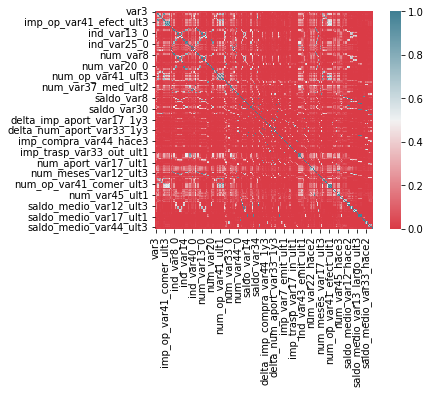

In [10]:
corr = train.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=0, vmax=1.0, square=True, cmap=cmap)

In [11]:
def correlation(corr,df,cutoff):
  print("Number of Columns before removing the highly correlated features",df.shape[1])
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > cutoff)]
  df.drop(to_drop, axis=1,inplace=True)
  print("Number of Columns after removing the highly correlated features",df.shape[1])
  return df
train = correlation(corr,train,0.98) 

Number of Columns before removing the highly correlated features 262
Number of Columns after removing the highly correlated features 209


In [12]:
#https://medium.com/@nissanttiwari/santander-customer-satisfaction-82eacb41a2b3
def sparse_features(df,threshold):
  print("Number of Columns before removing the sparse features",df.shape[1])
  zeros = (df.loc[:, :] == 0).astype(int).sum(axis=1)
  non_zeros = (df.loc[:, :] != 0).astype(int).sum(axis=1)
  sparse_columns = [] 
  for i in range(len(df.columns)):
    if (zeros[i]/(zeros[i]+non_zeros[i])) > threshold:
      sparse_columns.append(df.columns[i])
  df.drop(sparse_columns,axis=1,inplace=True)    
  print("Number of Columns after removing the sparse features",df.shape[1])
  return df

train = sparse_features(train,0.998)

Number of Columns before removing the sparse features 209
Number of Columns after removing the sparse features 209


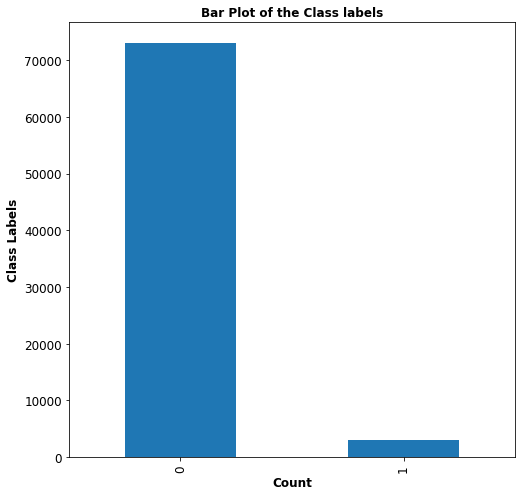

In [13]:
plt.figure(figsize=(8, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = pd.Series(Y).value_counts().sort_index().plot(kind='bar')
plt.title("Bar Plot of the Class labels",fontweight='bold')
plt.xlabel("Count",fontsize=12,fontweight='bold')
plt.ylabel("Class Labels",fontsize=12,fontweight='bold')
plt.show()

In [14]:
X = train.copy()
Y = Y.copy()

In [15]:
unique, counts = np.unique(np.array(Y), return_counts=True)
print("Percentage of Satisfied customers  [Target Label = 0] are",round(((counts[0]/(counts[0]+counts[1]))*100),2),'%')
print("Percentage of Unsatisfied customers[Target Label = 1] are",round(((counts[1]/(counts[0]+counts[1]))*100),2),'%')

Percentage of Satisfied customers  [Target Label = 0] are 96.04 %
Percentage of Unsatisfied customers[Target Label = 1] are 3.96 %


*There are 96.04% of negative points and 3.96% of positive points which shows that there is huge imbalance in the class lables provided.*

*Feature Selection using SelectFromModel*

In [16]:
x_train, x_cv, y_train, y_cv = train_test_split(X, Y,test_size=0.33,random_state=42,stratify=Y)

In [17]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

25

*We have got 25 top features using Random Forest Classifier*

In [18]:
import pickle 
with open('/content/drive/MyDrive/case_study_1/X','wb') as X_file:
  pickle.dump(X,X_file)

In [19]:
with open('/content/drive/MyDrive/case_study_1/Y','wb') as Y_file:
  pickle.dump(Y,Y_file)

In [20]:
with open('/content/drive/MyDrive/case_study_1/selected_features','wb') as file:
  pickle.dump(selected_feat.tolist(),file)